In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.lines import Line2D

# file = pd.read_csv("D:\\OneDrive - cc.ncu.edu.tw\\研究所\\實驗室\\code\\exp\\output\\20240902\\_W270_H123_S30_lift2_3x_2.csv")
# CoM_file = pd.read_csv("D:\\OneDrive - cc.ncu.edu.tw\\研究所\\實驗室\\code\\exp\\output\\20240902\\W270_H123_S30_lift2_3x_CoM.csv")
# pitch_file = pd.read_csv("D:\\OneDrive - cc.ncu.edu.tw\\研究所\\實驗室\\code\\exp\\output\\20240902\\W270_H123_S30_lift2_3x_pitch.csv")
file = pd.read_csv("D:\\OneDrive - cc.ncu.edu.tw\\研究所\\實驗室\\code\\exp\\output\\20240903\\_W240_H143_S30_3x_3.csv")
CoM_file = pd.read_csv("D:\\OneDrive - cc.ncu.edu.tw\\研究所\\實驗室\\code\\exp\\output\\20240903\W240_H143_S30_3x_CoM.csv")
pitch_file = pd.read_csv("D:\\OneDrive - cc.ncu.edu.tw\\研究所\\實驗室\\code\\exp\\output\\20240903\\W240_H143_S30_3x_pitch.csv")


In [12]:
Trigger_x = file["Trigger_x"]
first_valid_idx = np.where(~np.isnan(Trigger_x))[0][0]
final_valid_idx = 80*800  # second * sampling rate

x_max = 1500

O1 = file[["O1_x", "O1_y", "O1_z"]][first_valid_idx:].to_numpy()[:final_valid_idx]
O2 = file[["O2_x", "O2_y", "O2_z"]][first_valid_idx:].to_numpy()[:final_valid_idx]
O3 = file[["O3_x", "O3_y", "O3_z"]][first_valid_idx:].to_numpy()[:final_valid_idx]
O4 = file[["O4_x", "O4_y", "O4_z"]][first_valid_idx:].to_numpy()[:final_valid_idx]
CoM = (O1+O2+O3+O4)/4

reference_CoM = CoM_file[["CoM_x", "CoM_z"]].to_numpy()*1000   # m -> mm
reference_pitch = pitch_file["pitch"].to_numpy()
CoM_initial_offset = np.array([CoM[0, 0]-reference_CoM[0, 0], CoM[0, 1], CoM[0, 2]-reference_CoM[0, 1]])

# ground
ground = np.zeros((4, 3))
for i in range(4):
    ground[i] = file[["ground"+str(i+1)+"_x", "ground"+str(i+1)+"_y", "ground"+str(i+1)+"_z"]].to_numpy()[first_valid_idx]
ground[2, 0] = -100
ground[3, 0] = -100

# stair
n_stairs = 3
stairs = np.zeros((n_stairs, 4, 3))
for n in range(n_stairs):
    for i in range(3):
        stairs[n, i] = file[["stair"+str(n*3+i+1)+"_x", "stair"+str(n*3+i+1)+"_y", "stair"+str(n*3+i+1)+"_z"]].to_numpy()[first_valid_idx]
    tmp = stairs[n]
    stairs[n, 3] = np.array([tmp[0, 0]+(tmp[2, 0]-tmp[1, 0]), tmp[0, 1]+(tmp[2, 1]-tmp[1, 1]), tmp[0, 2]+(tmp[2, 2]-tmp[1, 2])]) 
stairs[n_stairs-1, 1, 0] = x_max
stairs[n_stairs-1, 2, 0] = x_max   

3D CoM

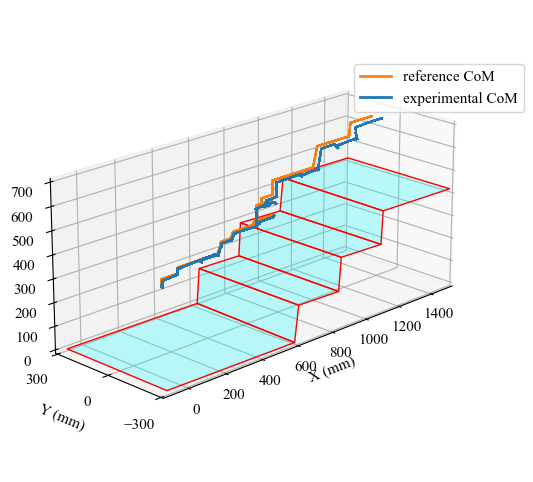

In [13]:
# 创建一个新的图形
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
fig_size = 12
fig = plt.figure(figsize = (fig_size,fig_size//2))

# 添加 3D 坐标轴
ax = fig.add_subplot(111, projection='3d')

# 绘制 3D 散点图
# ax.scatter(O1[:, 0], O1[:, 1], O1[:, 2], s=0.1)
# ax.scatter(O2[:, 0], O2[:, 1], O2[:, 2], s=0.1)
# ax.scatter(O3[:, 0], O3[:, 1], O3[:, 2], s=0.1)
# ax.scatter(O4[:, 0], O4[:, 1], O4[:, 2], s=0.1)
ax.scatter(CoM[:, 0], CoM[:, 1], CoM[:, 2], s=0.1, color='C0')
ax.scatter(reference_CoM[:, 0] + CoM_initial_offset[0], CoM_initial_offset[1], reference_CoM[:, 1] + CoM_initial_offset[2], s=0.1, color='C1')

# legend
CoM_legend = Line2D([0], [1], color='C0', lw=2)
reference_CoM_legend = Line2D([0], [1], color='C1', lw=2)
plt.legend(handles=[reference_CoM_legend, CoM_legend], labels=['reference CoM', 'experimental CoM'], loc='upper right', bbox_to_anchor=(1.1, 0.9))

# ground
ground[[0, 3], 1] = stairs[0, 0, 1]
ground[[1, 2], 1] = stairs[0, 3, 1]
# ax.add_collection3d(Poly3DCollection([ground], facecolors='cyan', linewidths=1, alpha=.25))
ax.add_collection3d(Poly3DCollection([ground], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))
# ax.scatter(*zip(*ground), color="r")

# stairs
last_edge = ground[[0, 1]]
for n in range(n_stairs):
    # ax.add_collection3d(Poly3DCollection([stairs[n]], facecolors='cyan', linewidths=1, alpha=.25))
    ax.add_collection3d(Poly3DCollection([stairs[n]], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))
    riser = np.vstack((last_edge, stairs[n, [3, 0]]))
    ax.add_collection3d(Poly3DCollection([riser], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))  # riser
    # ax.scatter(*zip(*stairs[n]), color="r") 
    last_edge = stairs[n, [1, 2]]

# point of view
# ax.view_init(elev=0, azim=-90)    # 側視
# ax.view_init(elev=90, azim=-90)    # 俯視
ax.view_init(elev=20, azim=-135)

ax.set_xlim([-100, x_max])
ax.set_ylim([-300, 300])
ax.set_zlim([0, 700])
ax.set_aspect('equal')
ax.yaxis.set_ticks([-300, 0, 300])

# 设置坐标轴标签
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')


plt.savefig('3d_plot.png', dpi=300, bbox_inches='tight', pad_inches=0.3)

plt.show()

2D CoM

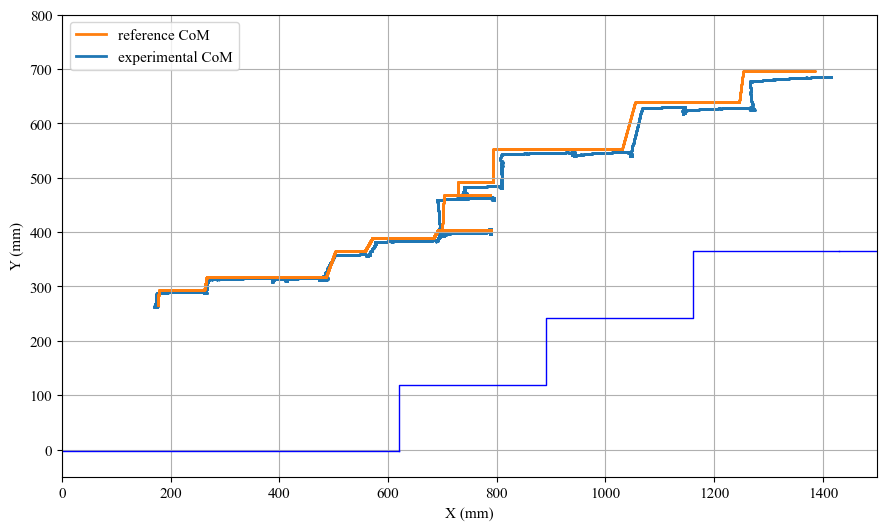

In [14]:
# 创建一个新的图形
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
fig_size = 12
fig, ax = plt.subplots(figsize = (fig_size,fig_size//2))

# 绘制 3D 散点图
# ax.scatter(O1[:, 0], O1[:, 2], s=0.1)
# ax.scatter(O2[:, 0], O2[:, 2], s=0.1)
# ax.scatter(O3[:, 0], O3[:, 2], s=0.1)
# ax.scatter(O4[:, 0], O4[:, 2], s=0.1)
ax.scatter(CoM[:, 0], CoM[:, 2], s=0.1)
ax.scatter(reference_CoM[:, 0] + CoM_initial_offset[0], reference_CoM[:, 1] + CoM_initial_offset[2], s=0.1, color='C1')

# legend
CoM_legend = Line2D([0], [1], color='C0', lw=2)
reference_CoM_legend = Line2D([0], [1], color='C1', lw=2)
plt.legend(handles=[reference_CoM_legend, CoM_legend], labels=['reference CoM', 'experimental CoM'], loc='upper left')

# ground
# ground_2D = np.array([np.average(ground[[2, 3]], axis=0), np.average(ground[[0, 1]], axis=0)])
# plt.plot([ground_2D[0, 0], ground_2D[1, 0]], [ground_2D[0, 2], ground_2D[1, 2]], color='b')
# stairs
# last_edge = ground_2D
# for n in range(n_stairs):
#     stair_2D = np.array([np.average(stairs[n,[0, 3]], axis=0), np.average(stairs[n,[1, 2]], axis=0)])
#     plt.plot([stair_2D[0, 0], stair_2D[1, 0]], [stair_2D[0, 2], stair_2D[1, 2]], color='b') # tread
#     plt.plot([last_edge[1, 0], stair_2D[0, 0]], [last_edge[1, 2], stair_2D[0, 2]], color='b') # riser
#     last_edge = stair_2D

#### Whole Terrain ####
W = 270
H = 123
Sx = np.array( [0] + [ W*j for i in range(0, n_stairs) for j in [i, i+1] ] ) + CoM_initial_offset[0]
Sy = np.array( [ H*j for i in range(0, n_stairs) for j in [i, i+1] ] + [H*(n_stairs)] ) + CoM_initial_offset[2]
plt.plot(Sx, Sy, 'b-', lw=1)    # stairs
plt.plot([Sx[0], 0], [Sy[0], Sy[0]], 'b-', lw=1) # lower ground
plt.plot([Sx[-1], x_max], [Sy[-1], Sy[-1]], 'b-', lw=1)   # upper ground

# set axis
ax.set_xlim([0, x_max])
ax.set_ylim([-50, 800])
ax.set_aspect('equal')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.grid()

# show
plt.show()

Pitch 

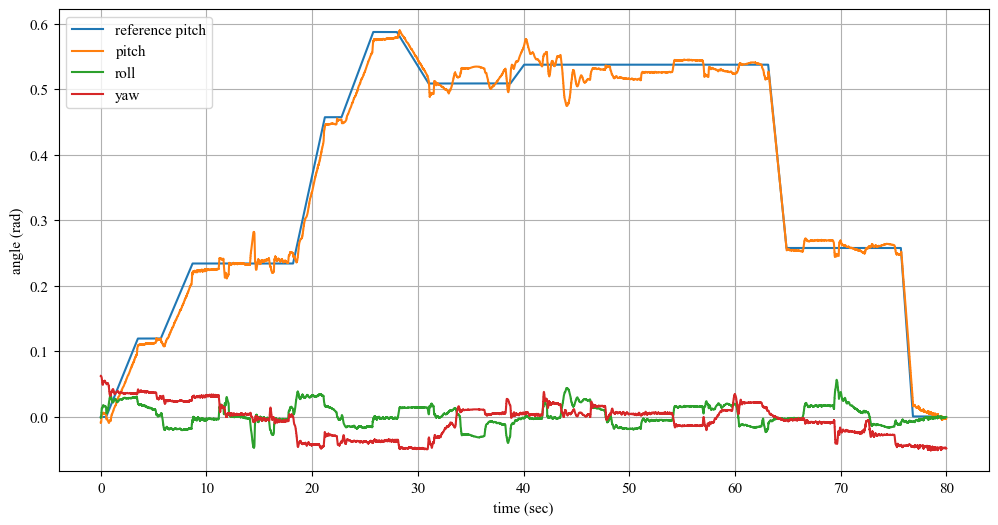

In [15]:
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
fig_size = 12
fig = plt.figure(figsize = (fig_size,fig_size//2))

front_hip = (O1+O2)/2
hind_hip = (O3+O4)/2
left_hip = (O1+O4)/2
right_hip = (O2+O3)/2
pitch = np.arctan( (front_hip[:, 2] - hind_hip[:, 2]) / (front_hip[:, 0] - hind_hip[:, 0])) # z/x
roll = np.arctan( (left_hip[:, 2] - right_hip[:, 2]) / (left_hip[:, 1] - right_hip[:, 1]))  # z/y
yaw = np.arctan( (front_hip[:, 1] - hind_hip[:, 1]) / (front_hip[:, 0] - hind_hip[:, 0])) # y/x

#### plot ####
plt.plot(np.arange(len(reference_pitch))/400, reference_pitch)
plt.plot(np.arange(len(pitch))/800, pitch)
plt.plot(np.arange(len(roll))/800, roll)
plt.plot(np.arange(len(yaw))/800, yaw)
plt.legend(['reference pitch', 'pitch', 'roll', 'yaw'], loc='upper left')

plt.xlabel("time (sec)")
plt.ylabel("angle (rad)")
plt.grid()

# show
plt.show()


In [16]:
print(reference_CoM[-1] + CoM_initial_offset[[0, 2]], CoM[-1])
print(np.max(pitch[:63600][0::2]- reference_pitch))


[1386.38317516  695.55330717] [1413.414032   -2.96109   685.033554]
0.04830861617124205


In [17]:
print(reference_CoM[0] - reference_CoM[-1])
final_reference_CoM = np.array([reference_CoM[-1, 0], 0, reference_CoM[-1, 1]]) + CoM_initial_offset
print( CoM[-1] - final_reference_CoM )
print( np.linalg.norm(CoM[-1] - final_reference_CoM))
print( np.linalg.norm(CoM[-1] - final_reference_CoM) / np.linalg.norm(reference_CoM[0] - reference_CoM[-1]) )

[-1209.74688916  -429.13591817]
[ 27.03085684 -28.54985775 -10.51975317]
40.699223648176606
0.0317069362858414


In [34]:
reference_CoM[0] + CoM_initial_offset[[0, 2]]

array([176.636286, 266.417389])

In [40]:
np.linalg.norm(CoM[-1]- CoM[0]) - np.linalg.norm(reference_CoM[0] - reference_CoM[-1])

22.408149231778907

Robot Data

In [19]:
# robot_file = pd.read_csv("D:\\OneDrive - cc.ncu.edu.tw\\研究所\\實驗室\\code\\exp\\output\\20240902\\W270_H123_S30_lift2_3x_robot.csv")
robot_file = pd.read_csv("D:\\OneDrive - cc.ncu.edu.tw\\研究所\\實驗室\\code\\exp\\output\\20240903\\W240_H143_S30_3x_robot.csv")

In [20]:
final_data_idx = 80*1000  # second * sampling rate
currentA = robot_file[['AR_rpy_torq', 'AL_rpy_torq']][:final_data_idx].to_numpy()
currentB = robot_file[['BR_rpy_torq', 'BL_rpy_torq']][:final_data_idx].to_numpy()
currentC = robot_file[['CR_rpy_torq', 'CL_rpy_torq']][:final_data_idx].to_numpy()
currentD = robot_file[['DR_rpy_torq', 'DL_rpy_torq']][:final_data_idx].to_numpy()

cmdA = robot_file[['AR_cmd_pos', 'AL_cmd_pos']][:final_data_idx].to_numpy()
posA = robot_file[['AR_rpy_pos', 'AL_rpy_pos']][:final_data_idx].to_numpy()
cmdB = robot_file[['BR_cmd_pos', 'BL_cmd_pos']][:final_data_idx].to_numpy()
posB = robot_file[['BR_rpy_pos', 'BL_rpy_pos']][:final_data_idx].to_numpy()
cmdC = robot_file[['CR_cmd_pos', 'CL_cmd_pos']][:final_data_idx].to_numpy()
posC = robot_file[['CR_rpy_pos', 'CL_rpy_pos']][:final_data_idx].to_numpy()
cmdD = robot_file[['DR_cmd_pos', 'DL_cmd_pos']][:final_data_idx].to_numpy()
posD = robot_file[['DR_rpy_pos', 'DL_rpy_pos']][:final_data_idx].to_numpy()

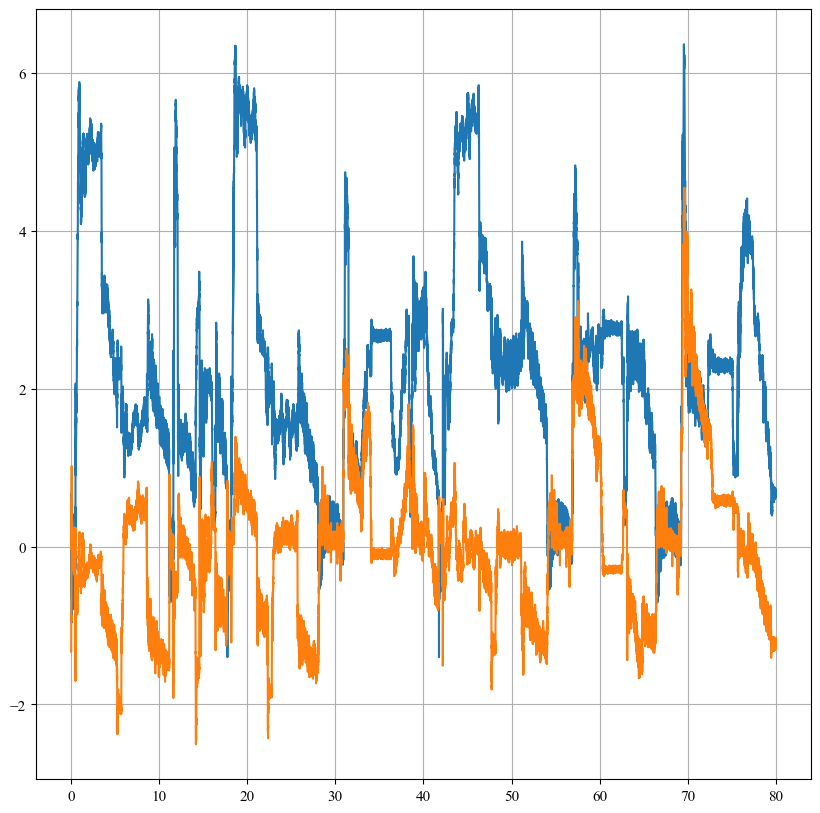

In [21]:
fig_size = 10
fig = plt.figure(figsize = (fig_size,fig_size))

plt.plot(np.arange(len(currentC))/1000, currentC)

plt.grid()
plt.show()

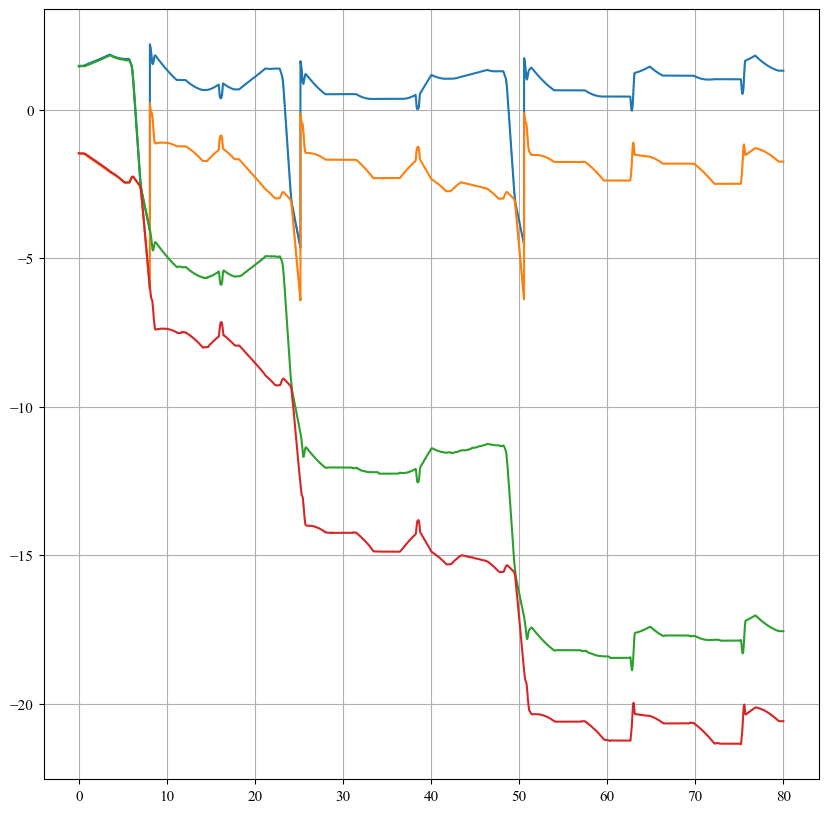

In [22]:
fig_size = 10
fig = plt.figure(figsize = (fig_size,fig_size))

plt.plot(np.arange(len(cmdA))/1000, cmdA)
plt.plot(np.arange(len(posA))/1000, posA)

plt.grid()
plt.show()

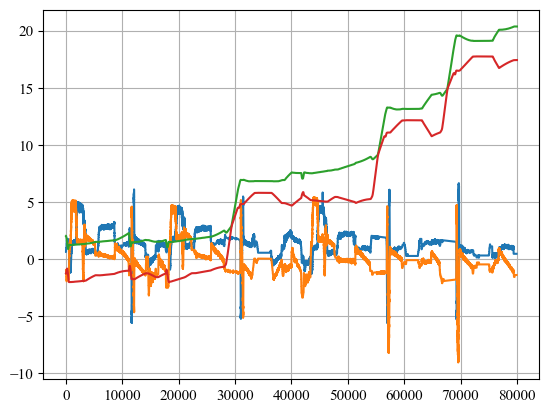

In [23]:
#### Tracking Error ####
diff = ((cmdB+2*np.pi)%(2*np.pi) - (posB+2*np.pi)%(2*np.pi) ) *180/np.pi
plt.plot(diff[abs(diff[:,0])<300, 0])
plt.plot(diff[abs(diff[:, 1])<300, 1])
plt.plot(posC)
# plt.plot(posA)
# plt.plot(posB)
# plt.plot(posD)

plt.grid()
plt.show()

In [24]:
motor_voltage = np.zeros((4, final_data_idx, 2))
motor_current = np.zeros((4, final_data_idx, 2))

for i in range(4):  # A, B, C, D
    motor_voltage[i] = robot_file[['Powerboard_' + str(4+2*i) + '_V', 'Powerboard_' + str(5+2*i) + '_V']][:final_data_idx].to_numpy()    # R, L
    motor_current[i] = robot_file[['Powerboard_' + str(4+2*i) + '_I', 'Powerboard_' + str(5+2*i) + '_I']][:final_data_idx].to_numpy()    # R, L


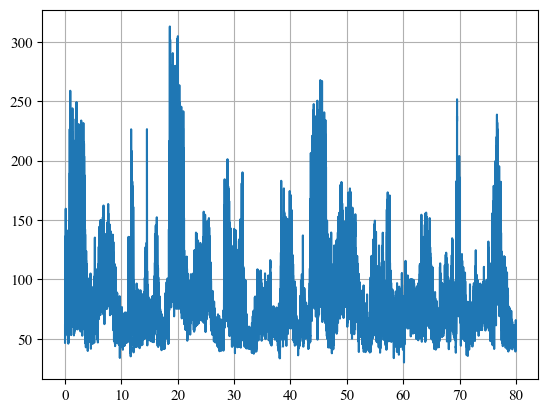

In [25]:
power = motor_voltage*motor_current
total_power = np.sum(power, axis=(0, 2))
plt.plot(np.arange(len(total_power))/1000, total_power)
plt.grid()
plt.show()

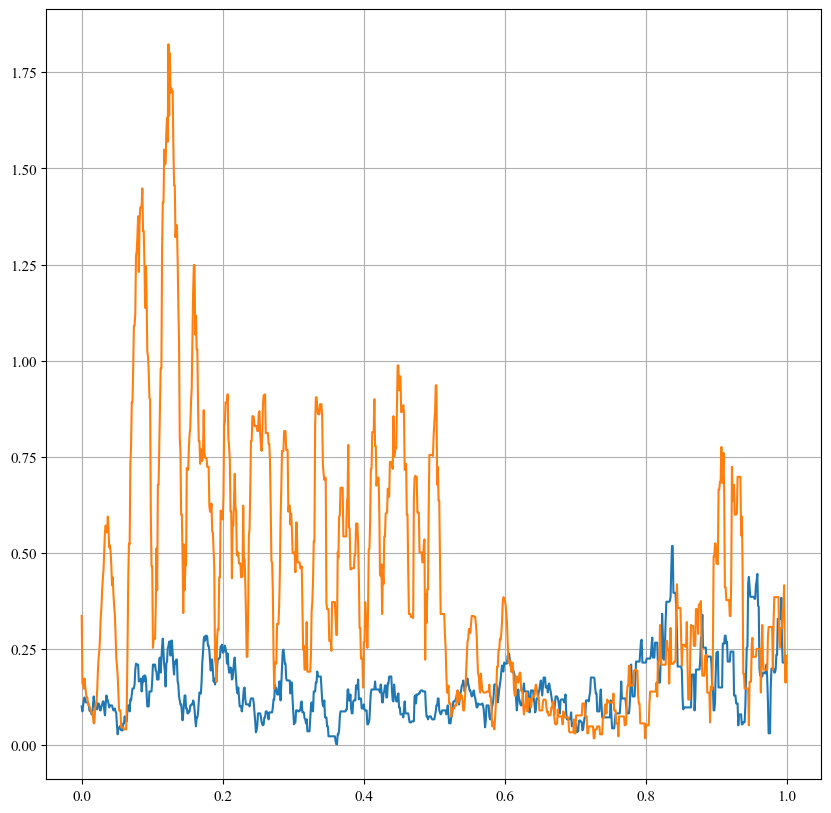

In [26]:
fig_size = 10
fig = plt.figure(figsize = (fig_size,fig_size))

plt.plot(np.arange(len(motor_current[0, :1000]))/1000, motor_current[0, :1000])

plt.grid()
plt.show()